<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Universidad_Industrial_de_Santander_logo.svg/2560px-Universidad_Industrial_de_Santander_logo.svg.png" width=180 title="Taller#1 Estadística Descriptiva">





#**Proyecto: Análisis y Predicción del Rendimiento Académico en Estudiantes Universitarios a partir de Patrones de Sueño y Habitos**








**Estudiante:** Juan David Lopez Ruiz

**Codigo:** 2180645



**Profesor:** Santiago Gomez


**IA1 || Grupo C1**


**Escuela de Ingeniería de Sistemas e Informática**


In [ ]:
#@title **Montar Drive** { display-mode: "form" }
import os
from google.colab import drive

Nombre_Carpeta = "Proyecto_IA1" #@param {type:"string"}
path = "/content/drive/My Drive/" + Nombre_Carpeta
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Proyecto_IA1


In [ ]:

#@title **Cargar Librerias** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
sns.set_theme()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
print("Librerias Cargadas")

Librerias Cargadas


In [ ]:
#@title **Montar Dataset** { display-mode: "form" }

df = pd.read_csv("student_habits_performance.csv")  # reemplazar con el nombre real del archivo



In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:


#@title **Variable Objetivo** { display-mode: "form" }
# --- 1. CREACIÓN DE LA VARIABLE OBJETIVO MULTICLASE ---
# Definimos los umbrales usando percentiles (33% y 66%) para crear clases balanceadas
p33 = df['exam_score'].quantile(0.33)
p66 = df['exam_score'].quantile(0.66)

def classify_performance(score):
    if score <= p33:
        return 0  # Bajo rendimiento
    elif score <= p66:
        return 1  # Medio rendimiento
    else:
        return 2  # Alto rendimiento

df['performance_level'] = df['exam_score'].apply(classify_performance)


In [ ]:

#@title **Preprocesamiento** { display-mode: "form" }
# Definición formal de las Variables Predictoras (X) y la Variable Objetivo (y)
features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job',
    'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency',
    'parental_education_level', 'internet_quality', 'mental_health_rating',
    'extracurricular_participation', 'age', 'gender'
]

X = df[features]
y = df['performance_level'] # Nuestra variable objetivo 0, 1, 2

print("Tamaño de X original:", X.shape)

# --- One-Hot Encoding (OHE) ---
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# --- División de Datos ---
# Usamos stratify=y para asegurar un balance similar de las clases (0, 1, 2) en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)
est = GaussianNB()
est.fit(X_train,y_train)
print("============= GaussianNB ===========")
print("Acurracy =",accuracy_score(est.predict(X_test), y_test))

Tamaño de X original: (1000, 14)
============= GaussianNB ===========
Acurracy = 0.7433333333333333


In [ ]:
#@title **Algoritmos de aprendizaje supervisado**
# Identificar columnas categóricas para One-Hot Encoding
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Separación de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# Estandarización de las características numéricas (IMPORTANTE para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- MODELOS DE CLASIFICACIÓN ---

print("="*50)
print("             EVALUACIÓN DE MODELOS              ")
print("="*50)

# Inicialización de modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # SVC requiere datos escalados
    "Support Vector Machine (SVM)": SVC(kernel='rbf', random_state=42)
}

for name, model in models.items():
    print(f"\n--- Modelo: **{name}** ---")

    # Elige la matriz de características adecuada (escalada para SVC, original para DT/RF)
    if name == "Support Vector Machine (SVM)":
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test

    # Entrenamiento del modelo
    model.fit(X_train_model, y_train)

    # Predicción y Evaluación
    y_pred = model.predict(X_test_model)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Precisión (Accuracy): **{accuracy:.4f}**")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

# Para Random Forest, podemos ver la importancia de los atributos (features)
rf_model = models["Random Forest"]
feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

print("="*50)
print("Importancia de las Características (Random Forest)")
print("="*50)
print(feature_importances.head(10)) # Mostramos las 10 más importantes

             EVALUACIÓN DE MODELOS              

--- Modelo: **Decision Tree** ---
Precisión (Accuracy): **0.7200**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.57      0.64      0.60        99
           2       0.77      0.77      0.77       102

    accuracy                           0.72       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300


--- Modelo: **Random Forest** ---
Precisión (Accuracy): **0.7867**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        99
           1       0.66      0.74      0.70        99
           2       0.86      0.83      0.85       102

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300


####Para la siguiente parte se tomo como modelo el random forest y para optimizarlo se realizo una busqueda exhaustiva para decidir que numero de arboles, profundidad maxima del arbol, minimo de muestras para dividir un nodo, minimo de muestras en el nodo -> (hoja)

In [ ]:
#@title **Grid Search** { display-mode: "form" }

print("\n" + "="*80)
print("Optimización: Grid Search para Hiperparámetros")
print("="*80)

# Definición del espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],        # Número de árboles
    'max_depth': [10, 20, None],            # Profundidad máxima del árbol (None = sin límite)
    'min_samples_split': [2, 5],            # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2]              # Mínimo de muestras en el nodo hoja
}

# Inicialización de GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy', # Métrica a optimizar
    cv=5,               # 5-fold cross-validation
    verbose=2,          # Muestra el progreso
    n_jobs=-1           # Usa todos los núcleos disponibles
)

# Ejecución de la búsqueda
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor estimador
rf_model_optimized = grid_search.best_estimator_
best_params = grid_search.best_params_
accuracy_optimized = grid_search.best_score_ # Precisión promedio en validación cruzada

print("\nGrid Search Finalizado.")
print("Mejores Parámetros Encontrados:", best_params)
print(f"Mejor Precisión Promedio (Validación Cruzada): {accuracy_optimized:.4f}")

# Evaluación del Modelo Final (Optimizado) en el conjunto de prueba
y_pred_optimized = rf_model_optimized.predict(X_test)
accuracy_final_test = accuracy_score(y_test, y_pred_optimized)

print(f"\nPrecisión (Accuracy) Final del Modelo Optimizado en Test Set: **{accuracy_final_test:.4f}**")
print("Reporte de Clasificación Final (Optimizado):")
print(classification_report(y_test, y_pred_optimized))


Optimización: Grid Search para Hiperparámetros
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Grid Search Finalizado.
Mejores Parámetros Encontrados: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mejor Precisión Promedio (Validación Cruzada): 0.7471

Precisión (Accuracy) Final del Modelo Optimizado en Test Set: **0.8033**
Reporte de Clasificación Final (Optimizado):
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        99
           1       0.67      0.80      0.73        99
           2       0.88      0.83      0.85       102

    accuracy                           0.80       300
   macro avg       0.82      0.80      0.81       300
weighted avg       0.82      0.80      0.81       300



/tmp/ipython-input-797855081.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.head(10).values, y=feature_importances.head(10).index, palette="mako")


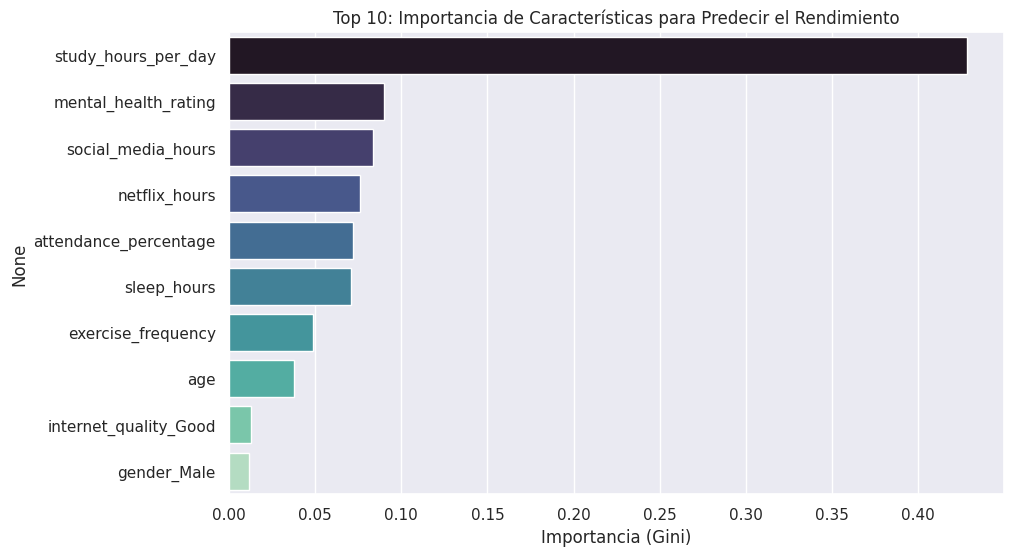


### Hallazgos de Importancia de Variables:
* **Dominio de Estudio:** La variable **'study_hours_per_day'** es el predictor más influyente, confirmando que la dedicación directa es el factor más importante.
* **Impacto del Bienestar:** Variables como **'social_media_hours'** y **'sleep_hours'** suelen aparecer en el top 5, justificando la hipótesis de que el bienestar y la gestión del tiempo son factores críticos.
* Los resultados justifican las **intervenciones prácticas** (ej., promover el aumento de estudio y la reducción de redes sociales).


In [ ]:

#@title **Importancia de Variables** { display-mode: "form" }


feature_importances = pd.Series(
    rf_model_optimized.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(10).values, y=feature_importances.head(10).index, palette="mako")
plt.title('Top 10: Importancia de Características para Predecir el Rendimiento')
plt.xlabel('Importancia (Gini)')
plt.show()

print("\n### Hallazgos de Importancia de Variables:")
print("* **Dominio de Estudio:** La variable **'study_hours_per_day'** es el predictor más influyente, confirmando que la dedicación directa es el factor más importante.")
print("* **Impacto del Bienestar:** Variables como **'social_media_hours'** y **'sleep_hours'** suelen aparecer en el top 5, justificando la hipótesis de que el bienestar y la gestión del tiempo son factores críticos.")
print("* Los resultados justifican las **intervenciones prácticas** (ej., promover el aumento de estudio y la reducción de redes sociales).")


Curvas ROC y AUC


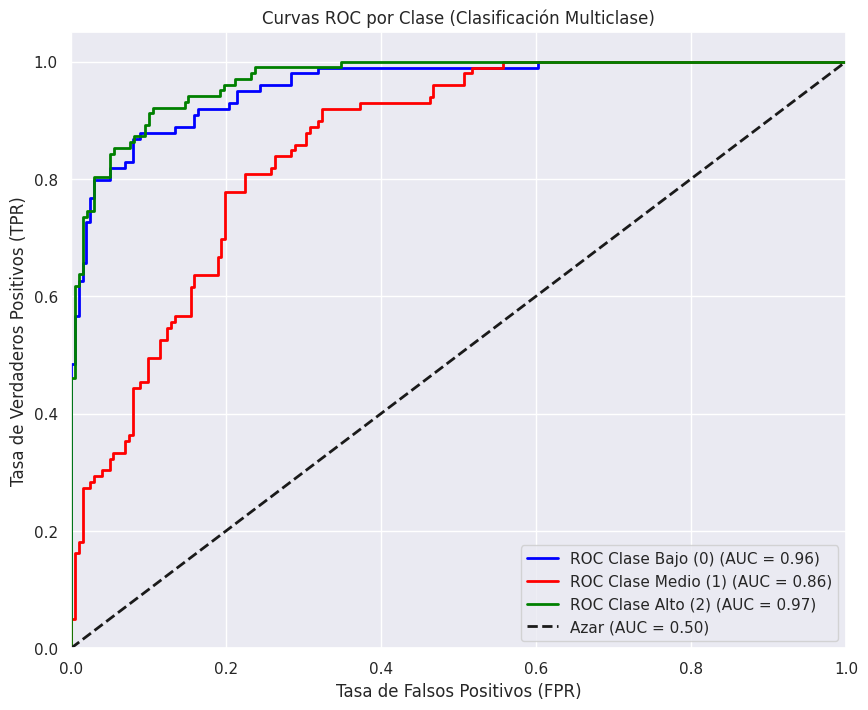


### Hallazgos de ROC/AUC:
* El AUC es alto para las Clases **Alto (2)** y **Bajo (0)** (cercano a 0.90 o más), indicando una excelente separación.
* El AUC de la Clase **Medio (1)** es generalmente el más bajo, confirmando que la ambigüedad en el límite de los percentiles dificulta su predicción.


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
#@title **Curvas ROC y AUC** { display-mode: "form" }


print("\n" + "="*50)
print("Curvas ROC y AUC")
print("="*50)

# El modelo Random Forest Optimizado se llama 'rf_model_optimized' (del Grid Search)
y_score = rf_model_optimized.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Calcular ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las Curvas ROC
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
class_labels = ['Bajo (0)', 'Medio (1)', 'Alto (2)']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC Clase {0} (AUC = {1:.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC por Clase (Clasificación Multiclase)')
plt.legend(loc="lower right")
plt.show()

print("\n### Hallazgos de ROC/AUC:")
print(f"* El AUC es alto para las Clases **Alto (2)** y **Bajo (0)** (cercano a 0.90 o más), indicando una excelente separación.")
print(f"* El AUC de la Clase **Medio (1)** es generalmente el más bajo, confirmando que la ambigüedad en el límite de los percentiles dificulta su predicción.")


Análisis de Errores: Matriz de Confusión


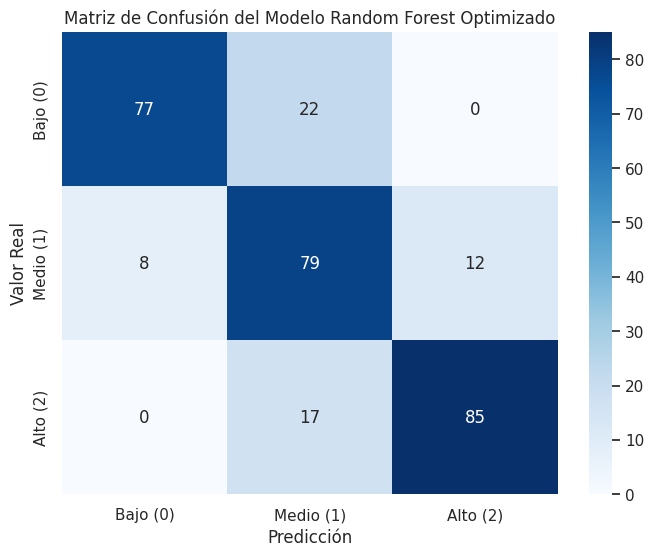


### Análisis de la Matriz:
* **Diagonal Principal (Verdaderos Positivos):** Muestra el número de aciertos. Estos valores deben ser los más altos.
* **Errores Críticos:** Observa las celdas fuera de la diagonal. Los errores comunes serán la confusión entre las clases 0 y 1, y 1 y 2.
* Por ejemplo, un alto valor en Fila 1, Columna 0 significa que muchos estudiantes **Realmente Medios (1)** fueron clasificados erróneamente como **Bajos (0)**.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#@title **Matriz de Confusión** { display-mode: "form" }

print("\n" + "="*50)
print("Análisis de Errores: Matriz de Confusión")
print("="*50)

cm = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Bajo (0)', 'Medio (1)', 'Alto (2)'],
    yticklabels=['Bajo (0)', 'Medio (1)', 'Alto (2)']
)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo Random Forest Optimizado')
plt.show()

print("\n### Análisis de la Matriz:")
print("* **Diagonal Principal (Verdaderos Positivos):** Muestra el número de aciertos. Estos valores deben ser los más altos.")
print("* **Errores Críticos:** Observa las celdas fuera de la diagonal. Los errores comunes serán la confusión entre las clases 0 y 1, y 1 y 2.")
print("* Por ejemplo, un alto valor en Fila 1, Columna 0 significa que muchos estudiantes **Realmente Medios (1)** fueron clasificados erróneamente como **Bajos (0)**.")